In [1]:
import time
import sys; sys.path.insert(0, "..")
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

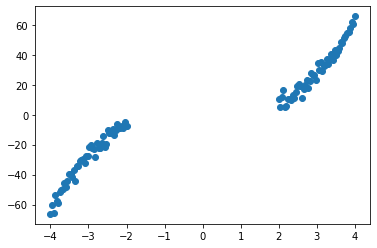

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

In [6]:
n_aux = 30
reg_grid = [0., 100., 500., 1000., 2000., 5000.]
div_grid = [0., 10., 100., 1000., 10000.]
max_iteration_nlm = 5000
max_iteration_luna = 5000

In [8]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, div max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8550.0566919931; gradient mag: 19623.819460308798
Iteration 100 loss 81.55686920030575; gradient mag: 66.27103607860792
Iteration 200 loss 21.926039521028024; gradient mag: 34.293778002212896
Iteration 300 loss 9.881357179468752; gradient mag: 6.1052320570291165
Iteration 400 loss 8.933716375629938; gradient mag: 3.1547643648716854
Iteration 500 loss 8.7824927647193; gradient mag: 2.237953565884215
Iteration 600 loss 8.384260336575437; gradient mag: 1.5017749371545284
Iteration 700 loss 8.260670830188834; gradient mag: 2.4820724931738702
Iteration 800 loss 8.195859705297833; gradient mag: 2.4389818400171257
Iteration 900 loss 8.173416414615478; gradient mag: 3.004700656457006
Iteration 1000 loss 8.150691092648007; gradient mag: 3.945079762088246
Iteration 1100 loss 8.126950303927693; gradient mag: 2.646172975411257
Iteration 1200 loss 8.105561976731297; gradient mag: 4.164980502276573
Iteration 1300 loss 8.08142725639162; grad

In [7]:
luna_list = []

for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 30 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 13017.773662112306; gradient mag: 7358.575797677183
Iteration 100 loss 108.9253121752224; gradient mag: 27.010967128051835
Iteration 200 loss 44.301815066322774; gradient mag: 18.908290286655262
Iteration 300 loss 16.23006258189508; gradient mag: 7.0041237594442025
Iteration 400 loss 11.974672157985113; gradient mag: 6.457886476170053
Iteration 500 loss 10.670211763597731; gradient mag: 2.1556372446395673
Iteration 600 loss 10.070209175095604; gradient mag: 3.214056583307592
Iteration 700 loss 9.649263763680135; gradient mag: 5.1336715022071315
Iteration 800 loss 9.354872001775188; gradient mag: 2.750753815950974
Iteration 900 loss 9.086864667687216; gradient mag: 3.4268541794999643
Iteration 1000 loss 8.879750316298084; gradient mag: 1.3441654643408683
Iteration 1100 loss 8.703714483031114; gradient mag: 6.506286279566251
Iteration 1200 loss 8.52471577266521; gradient mag: 4.4

Iteration 1400 loss 19.240782174169922; gradient mag: 7.178276710250557

Training took 0:00:48 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 100.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 13126.999377501588; gradient mag: 7359.685301481573
Iteration 100 loss 197.33059235733793; gradient mag: 32.28519642600771
Iteration 200 loss 130.12995184724358; gradient mag: 16.647387345609285
Iteration 300 loss 110.219217499046; gradient mag: 9.404139547852067
Iteration 400 loss 100.55540108058703; gradient mag: 5.364395033691794
Iteration 500 loss 98.81493707912882; gradient mag: 5.358073507016449
Iteration 600 loss 97.53882597807537; gradient mag: 5.841105191281018
Iteration 700 loss 96.16399819963718; gradient mag: 6.565874185236738
Iteration 800 loss 94.70840575390469; gradient mag: 4.577579943169981
Iteration 900 loss 93.44456745703656; gradient mag: 15.556089534413783
Iteration 1000 loss 92.17227424863538; gradient mag: 8.407143415872943
Iteration 1100 loss 90.77

Iteration 1200 loss 193.79902538110971; gradient mag: 18.68642254851262
Iteration 1300 loss 192.68245455002767; gradient mag: 23.38075236743092
Iteration 1400 loss 191.21300444538838; gradient mag: 26.76998018267252

Training took 0:00:47 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 500.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 13610.120018662636; gradient mag: 7373.692484004006
Iteration 100 loss 624.0232736410537; gradient mag: 64.80554201612067
Iteration 200 loss 551.8996135874859; gradient mag: 38.63886507239021
Iteration 300 loss 507.9874758422849; gradient mag: 27.39404471071761
Iteration 400 loss 488.96657170275137; gradient mag: 28.477086265585484
Iteration 500 loss 472.5805129996134; gradient mag: 31.07794964289507
Iteration 600 loss 458.19591770494577; gradient mag: 90.05330241376065
Iteration 700 loss 443.3317195882677; gradient mag: 26.827559273109333
Iteration 800 loss 430.39583046965515; gradient mag: 48.12390792500735
Iteration 900 loss 4

Iteration 1000 loss 934.183266798908; gradient mag: 349.47675635503464
Iteration 1100 loss 923.4656617420615; gradient mag: 221.72912401871721
Iteration 1200 loss 913.0157265218195; gradient mag: 164.50880523276186
Iteration 1300 loss 903.392719570007; gradient mag: 41.661868135991504
Iteration 1400 loss 894.2951862012593; gradient mag: 182.34946674234217

Training took 0:00:54 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 1000.0 ] === [ Diversification: 1000.0 ] =====

Iteration 0 loss 14943.919319054714; gradient mag: 7574.013100820628
Iteration 100 loss 1549.1972026043836; gradient mag: 754.8392989843143
Iteration 200 loss 1441.800510842132; gradient mag: 247.61321702667294
Iteration 300 loss 1384.6115341860739; gradient mag: 89.88482631263076
Iteration 400 loss 1342.26261583926; gradient mag: 196.26350278151364
Iteration 500 loss 1304.7240760831003; gradient mag: 142.09246960648517
Iteration 600 loss 1271.6926744123034; gradient mag: 586.1575521080968
Iteration 700 l

Iteration 800 loss 5745.219548086123; gradient mag: 3719.5864109353806
Iteration 900 loss 5745.767220004226; gradient mag: 4725.591255444028
Iteration 1000 loss 5727.994155522896; gradient mag: 6168.855681908509
Iteration 1100 loss 5707.43649109328; gradient mag: 2001.03421956273
Iteration 1200 loss 5686.16444392607; gradient mag: 2677.7692866571415
Iteration 1300 loss 5668.859858572208; gradient mag: 484.54628144804406
Iteration 1400 loss 5683.371084250948; gradient mag: 6207.706265647348

Training took 0:00:51 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 2000.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 24298.717583393496; gradient mag: 12058.822396216563
Iteration 100 loss 6861.934461060856; gradient mag: 2903.6828943326614
Iteration 200 loss 6760.882585951746; gradient mag: 6701.2959994168705
Iteration 300 loss 6584.624178290447; gradient mag: 5413.284499807923
Iteration 400 loss 6516.116464830401; gradient mag: 3278.9827233688798
Iteration 500 loss 

## Plot auxiliary functions after fitting

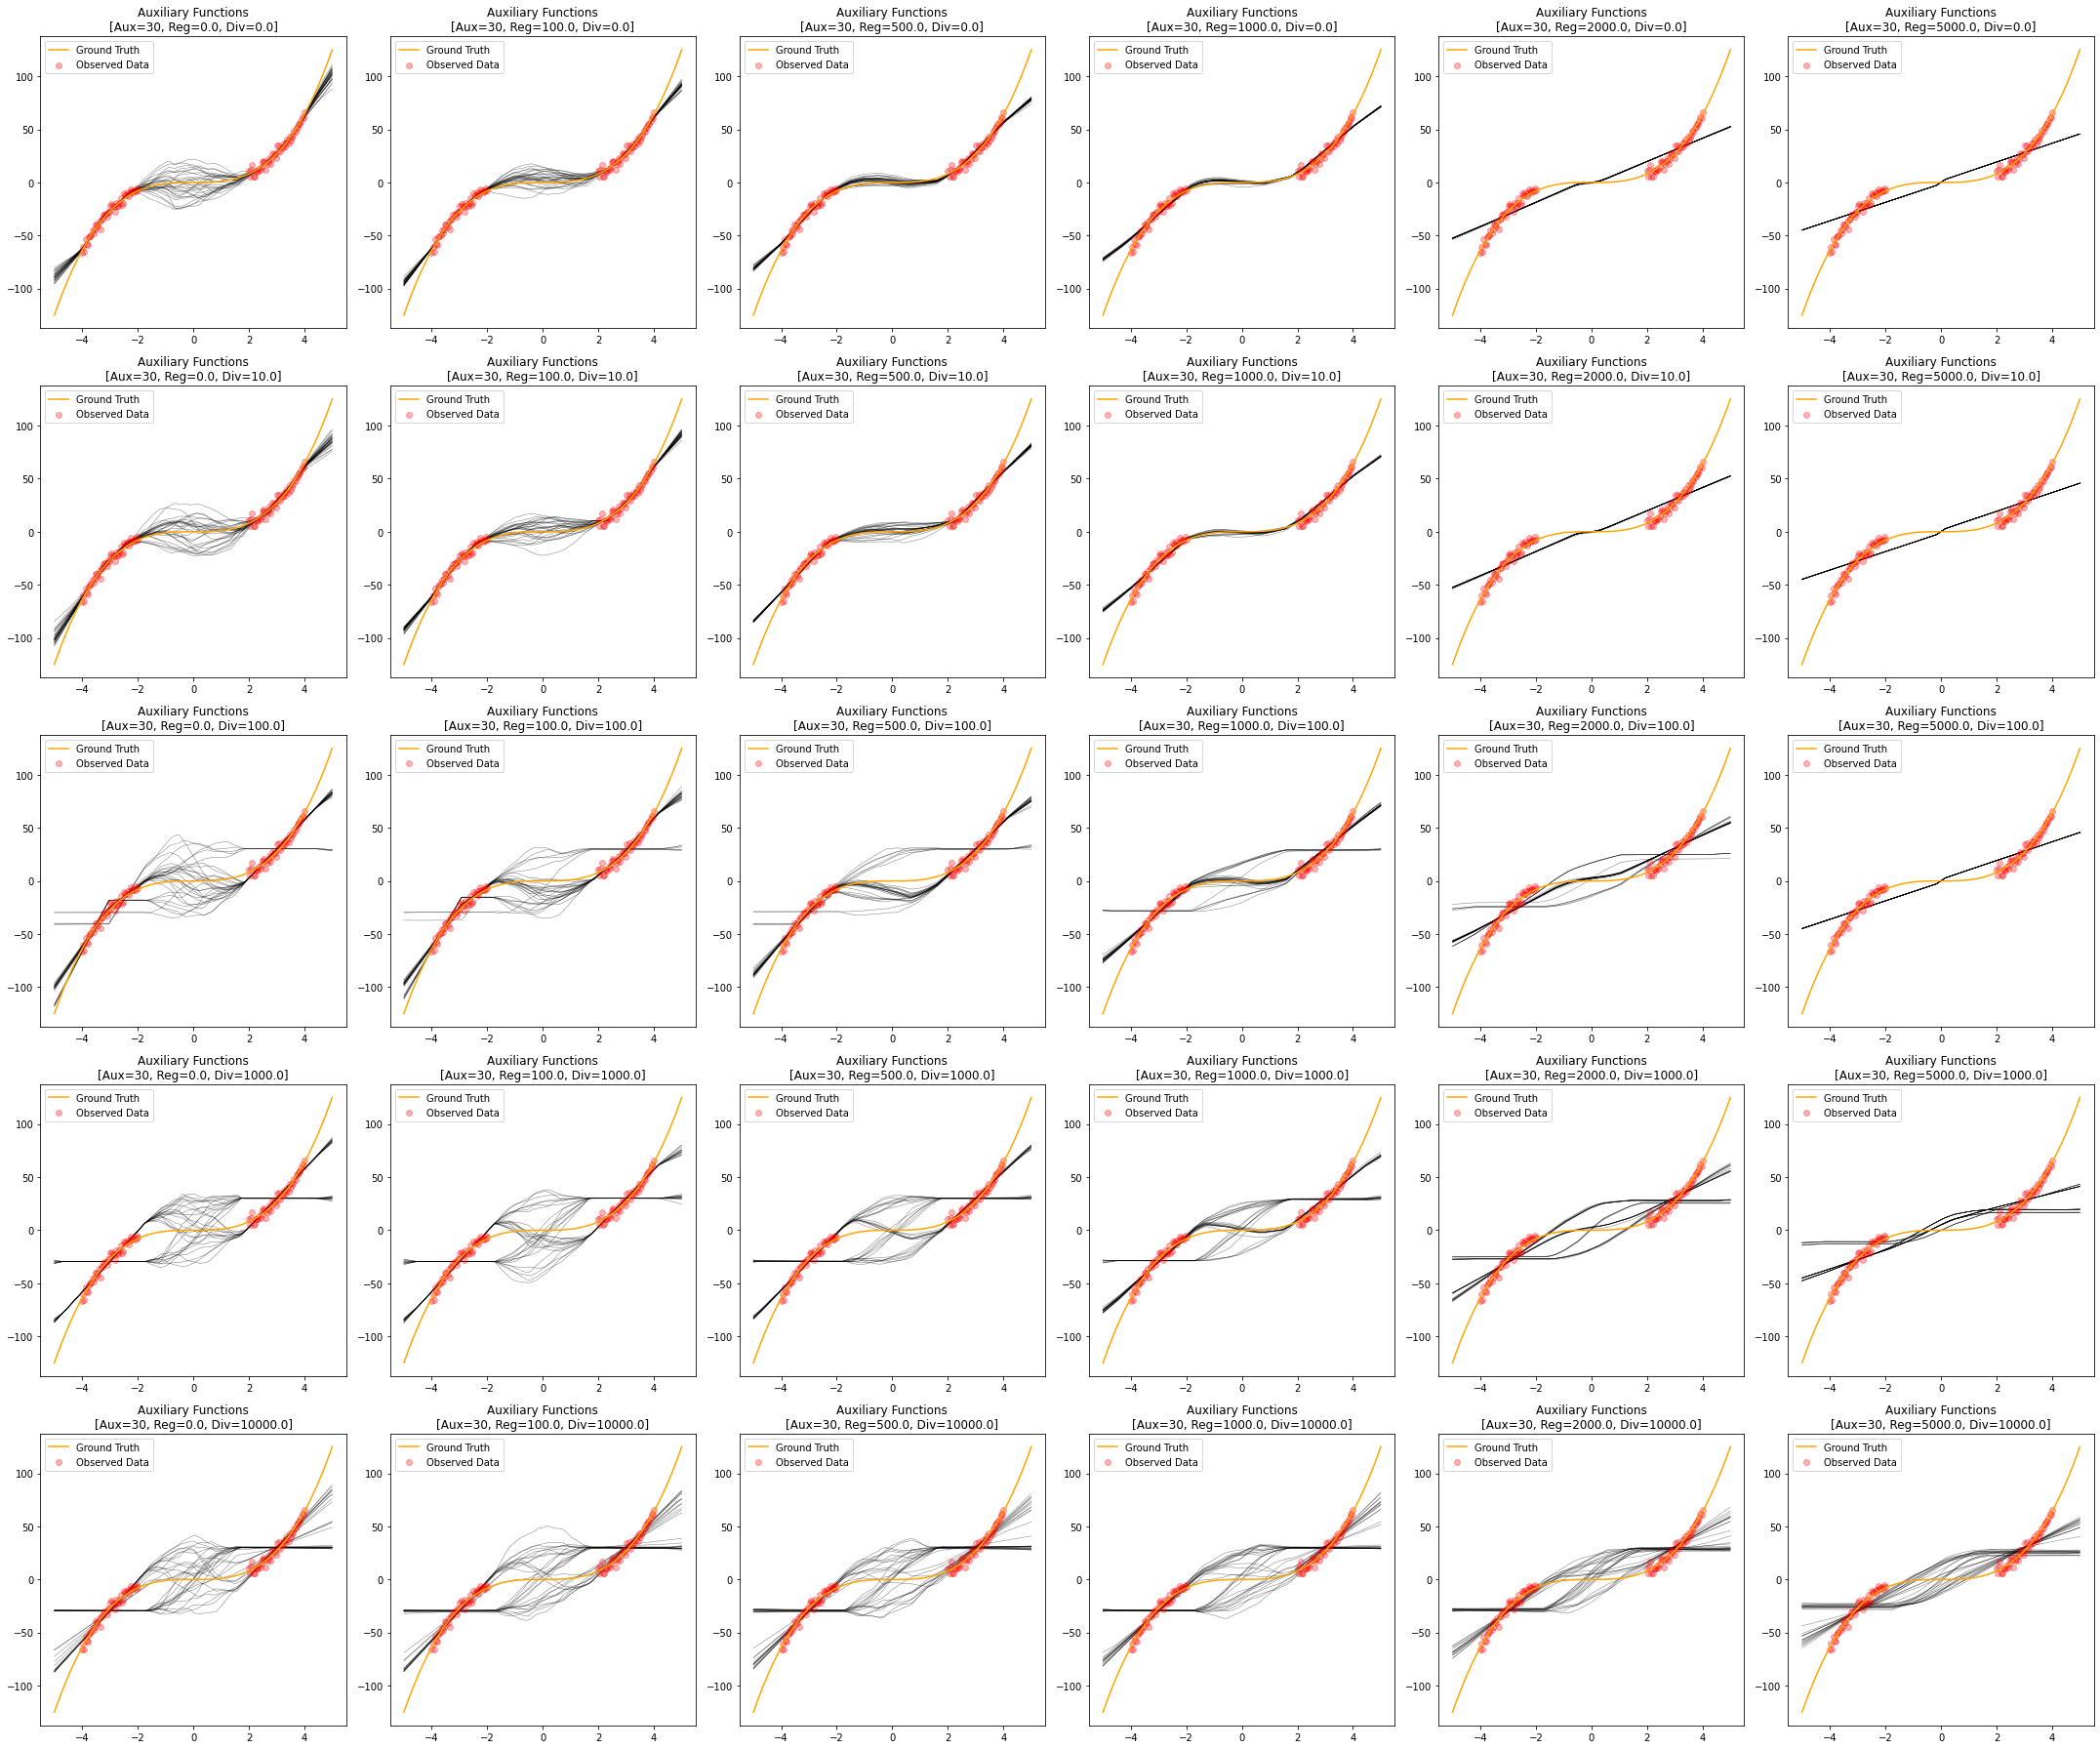

In [9]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(30, 25))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
    ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]")
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

## Plot prior samples

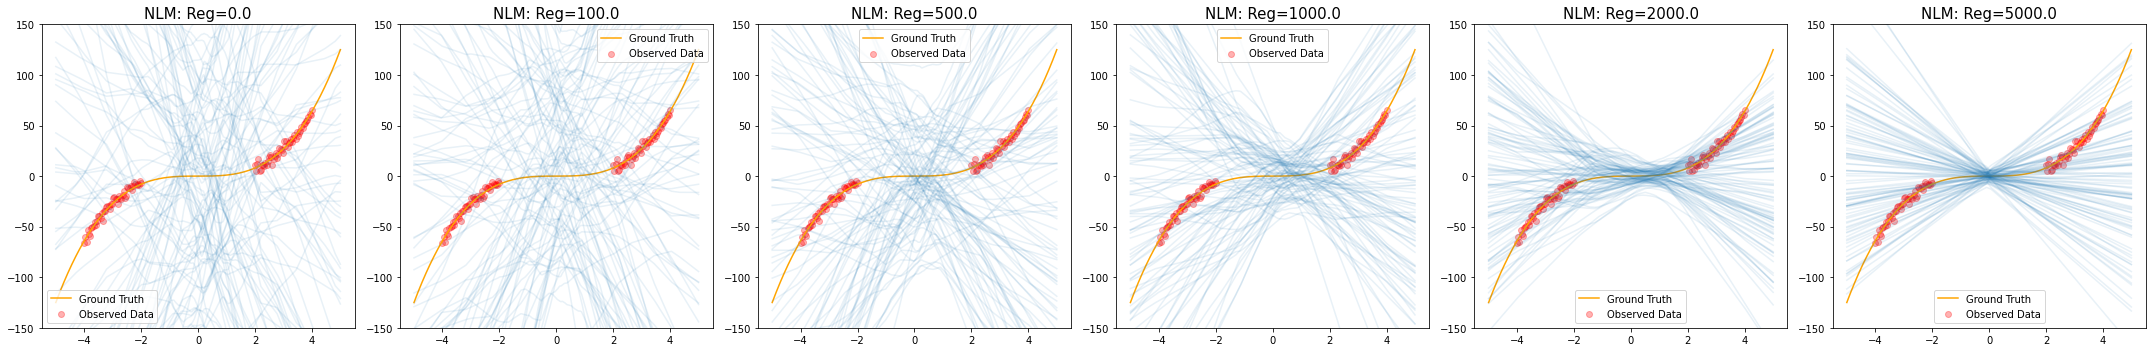

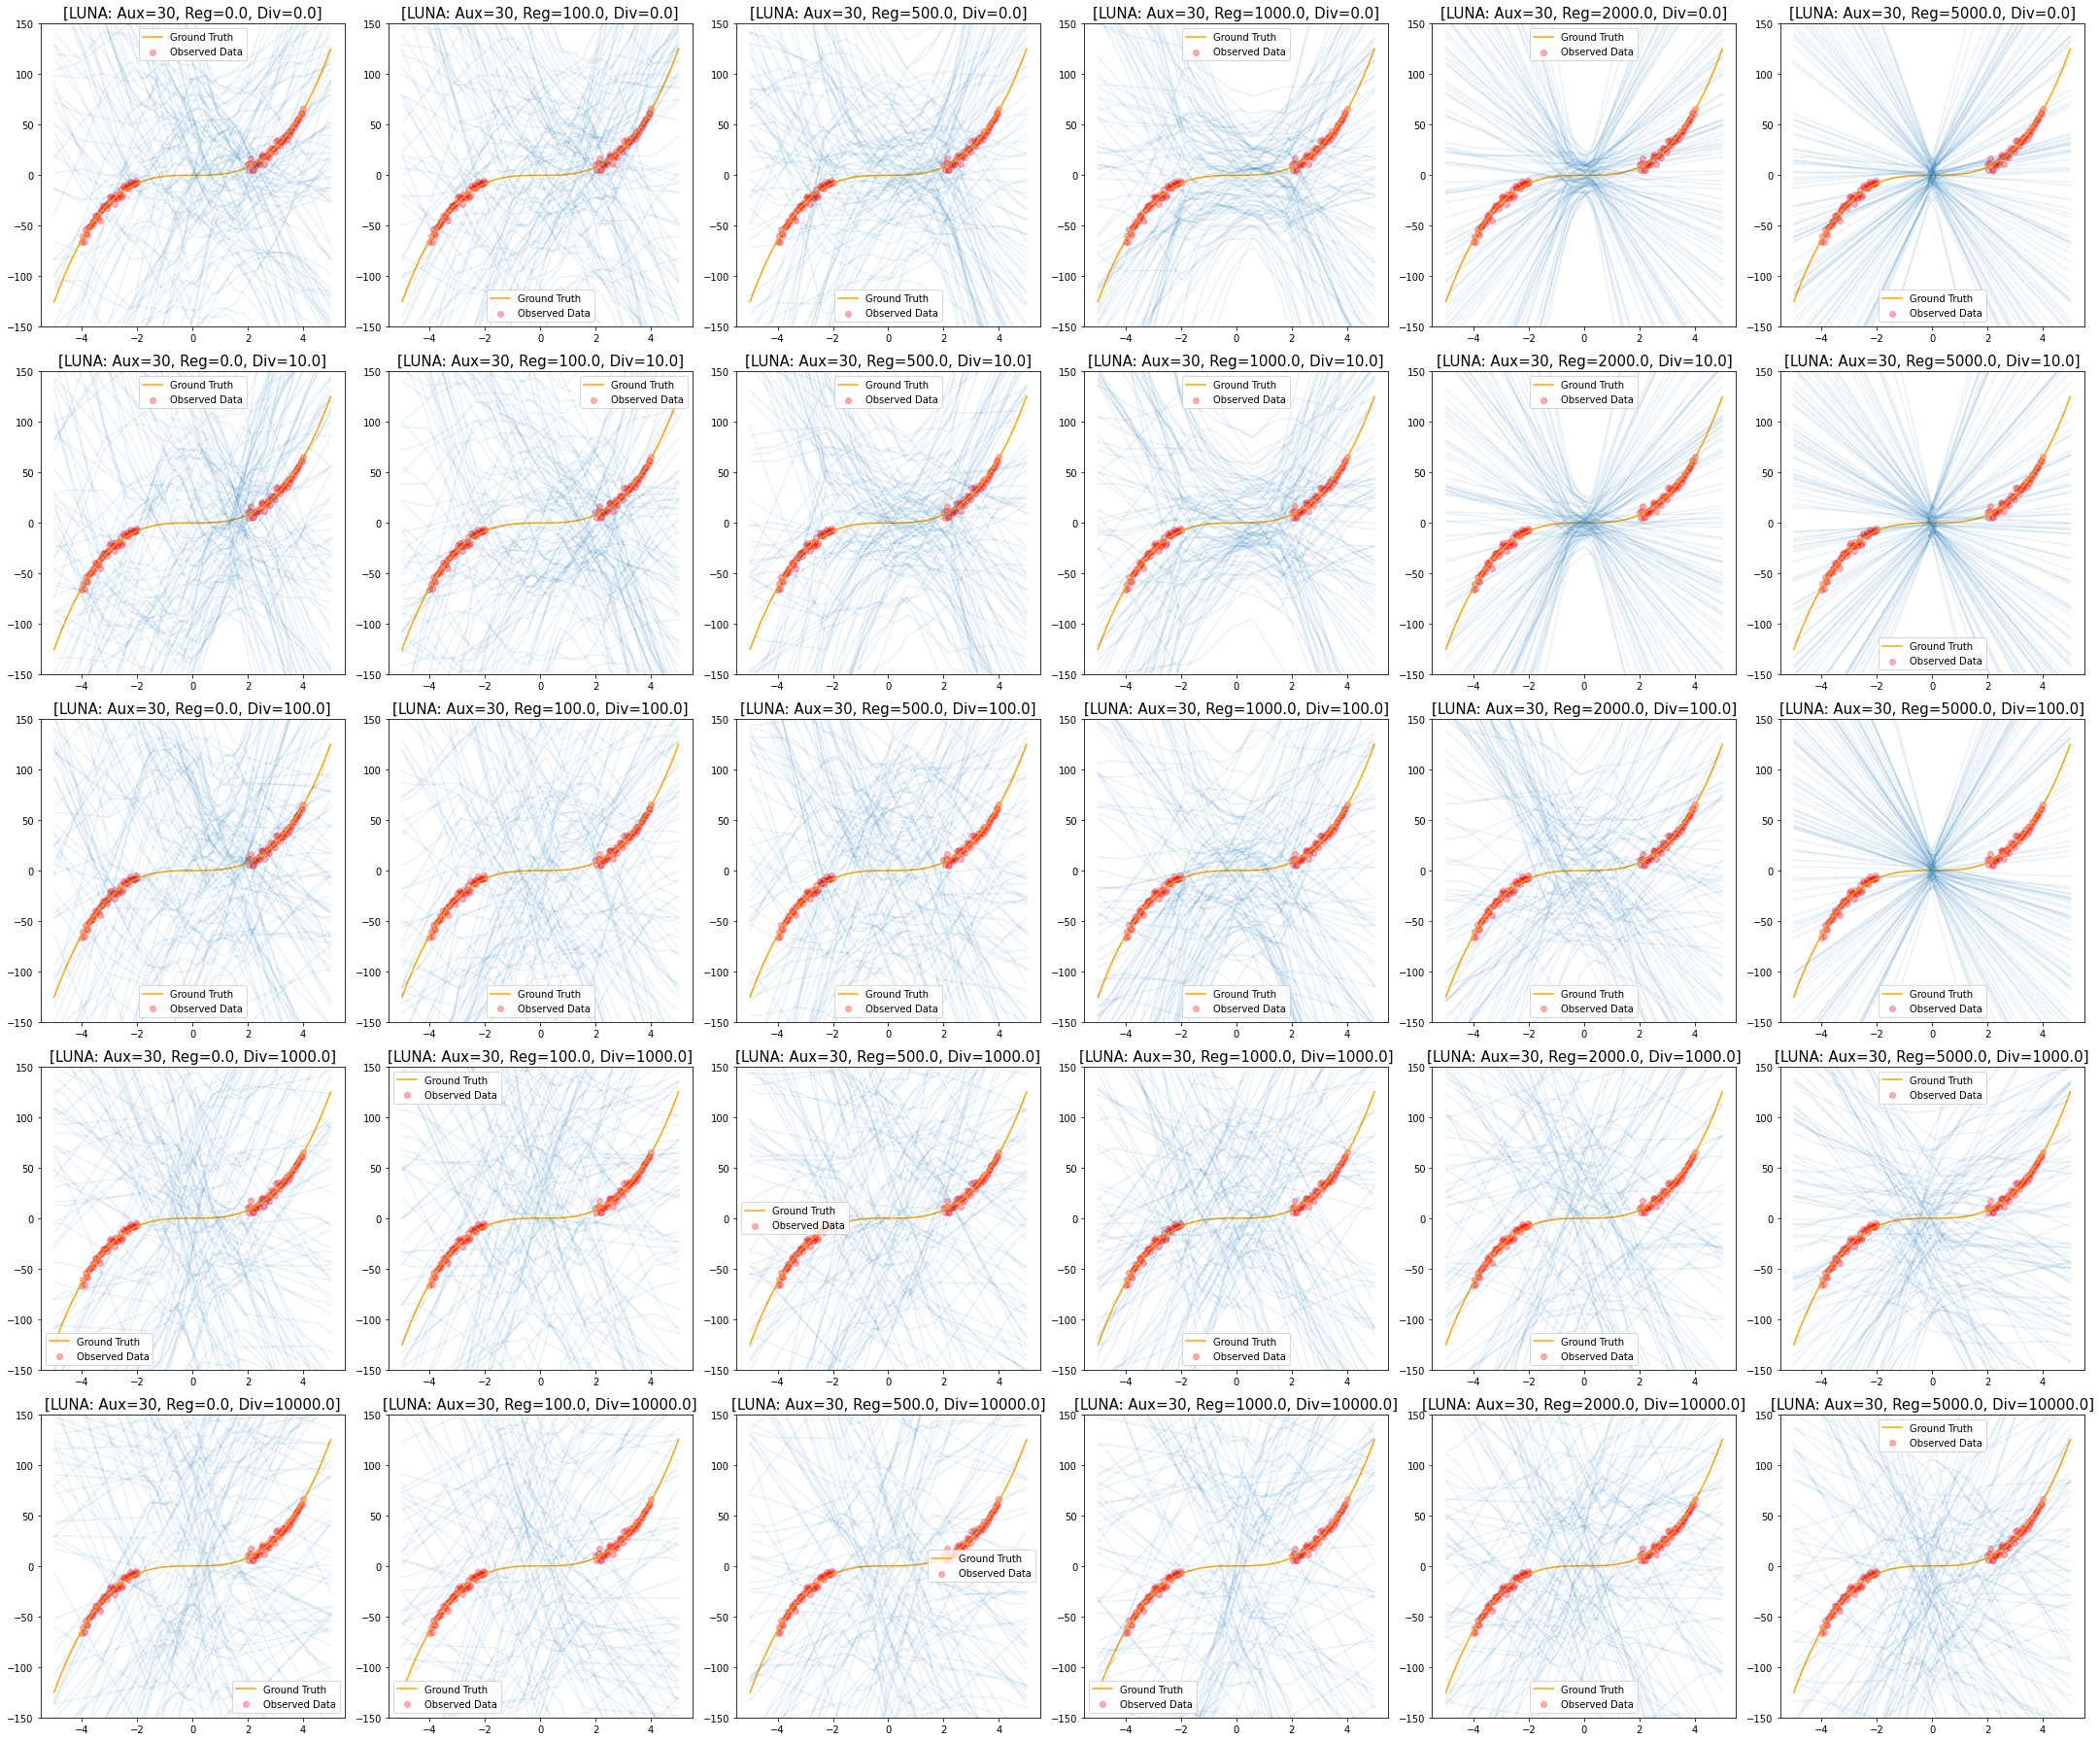

In [42]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 5))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM: Reg={reg_grid[i]}",fontsize = 15)
    ax.set_ylim([-150, 150])
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(30, 25))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize=15)
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

## Plot posterior samples

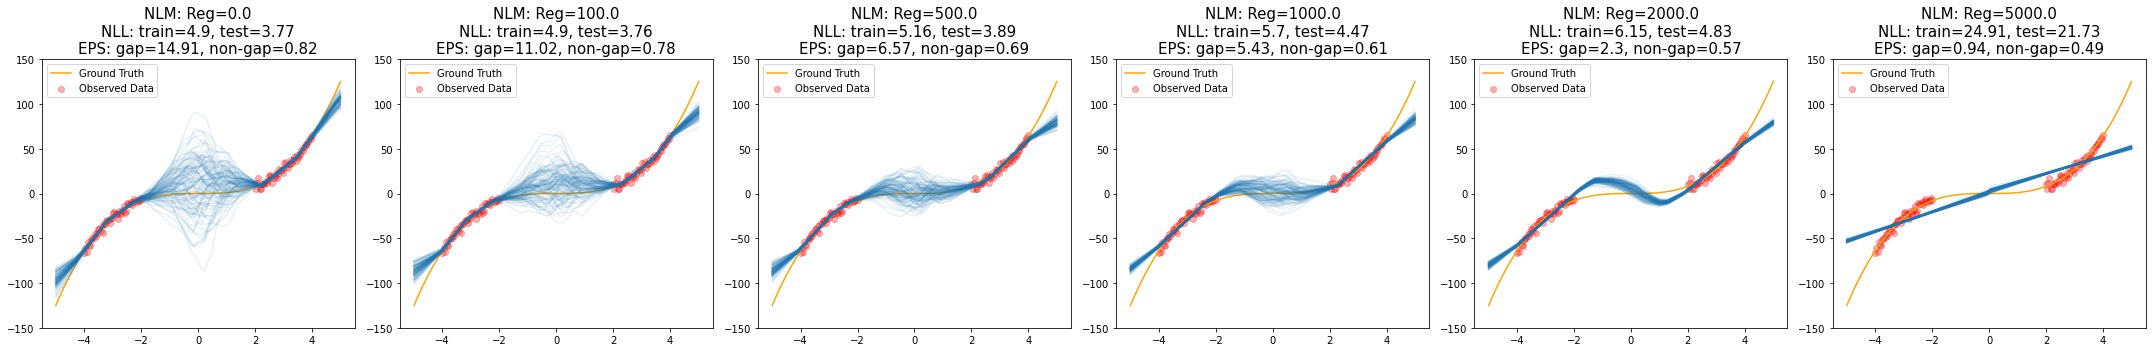

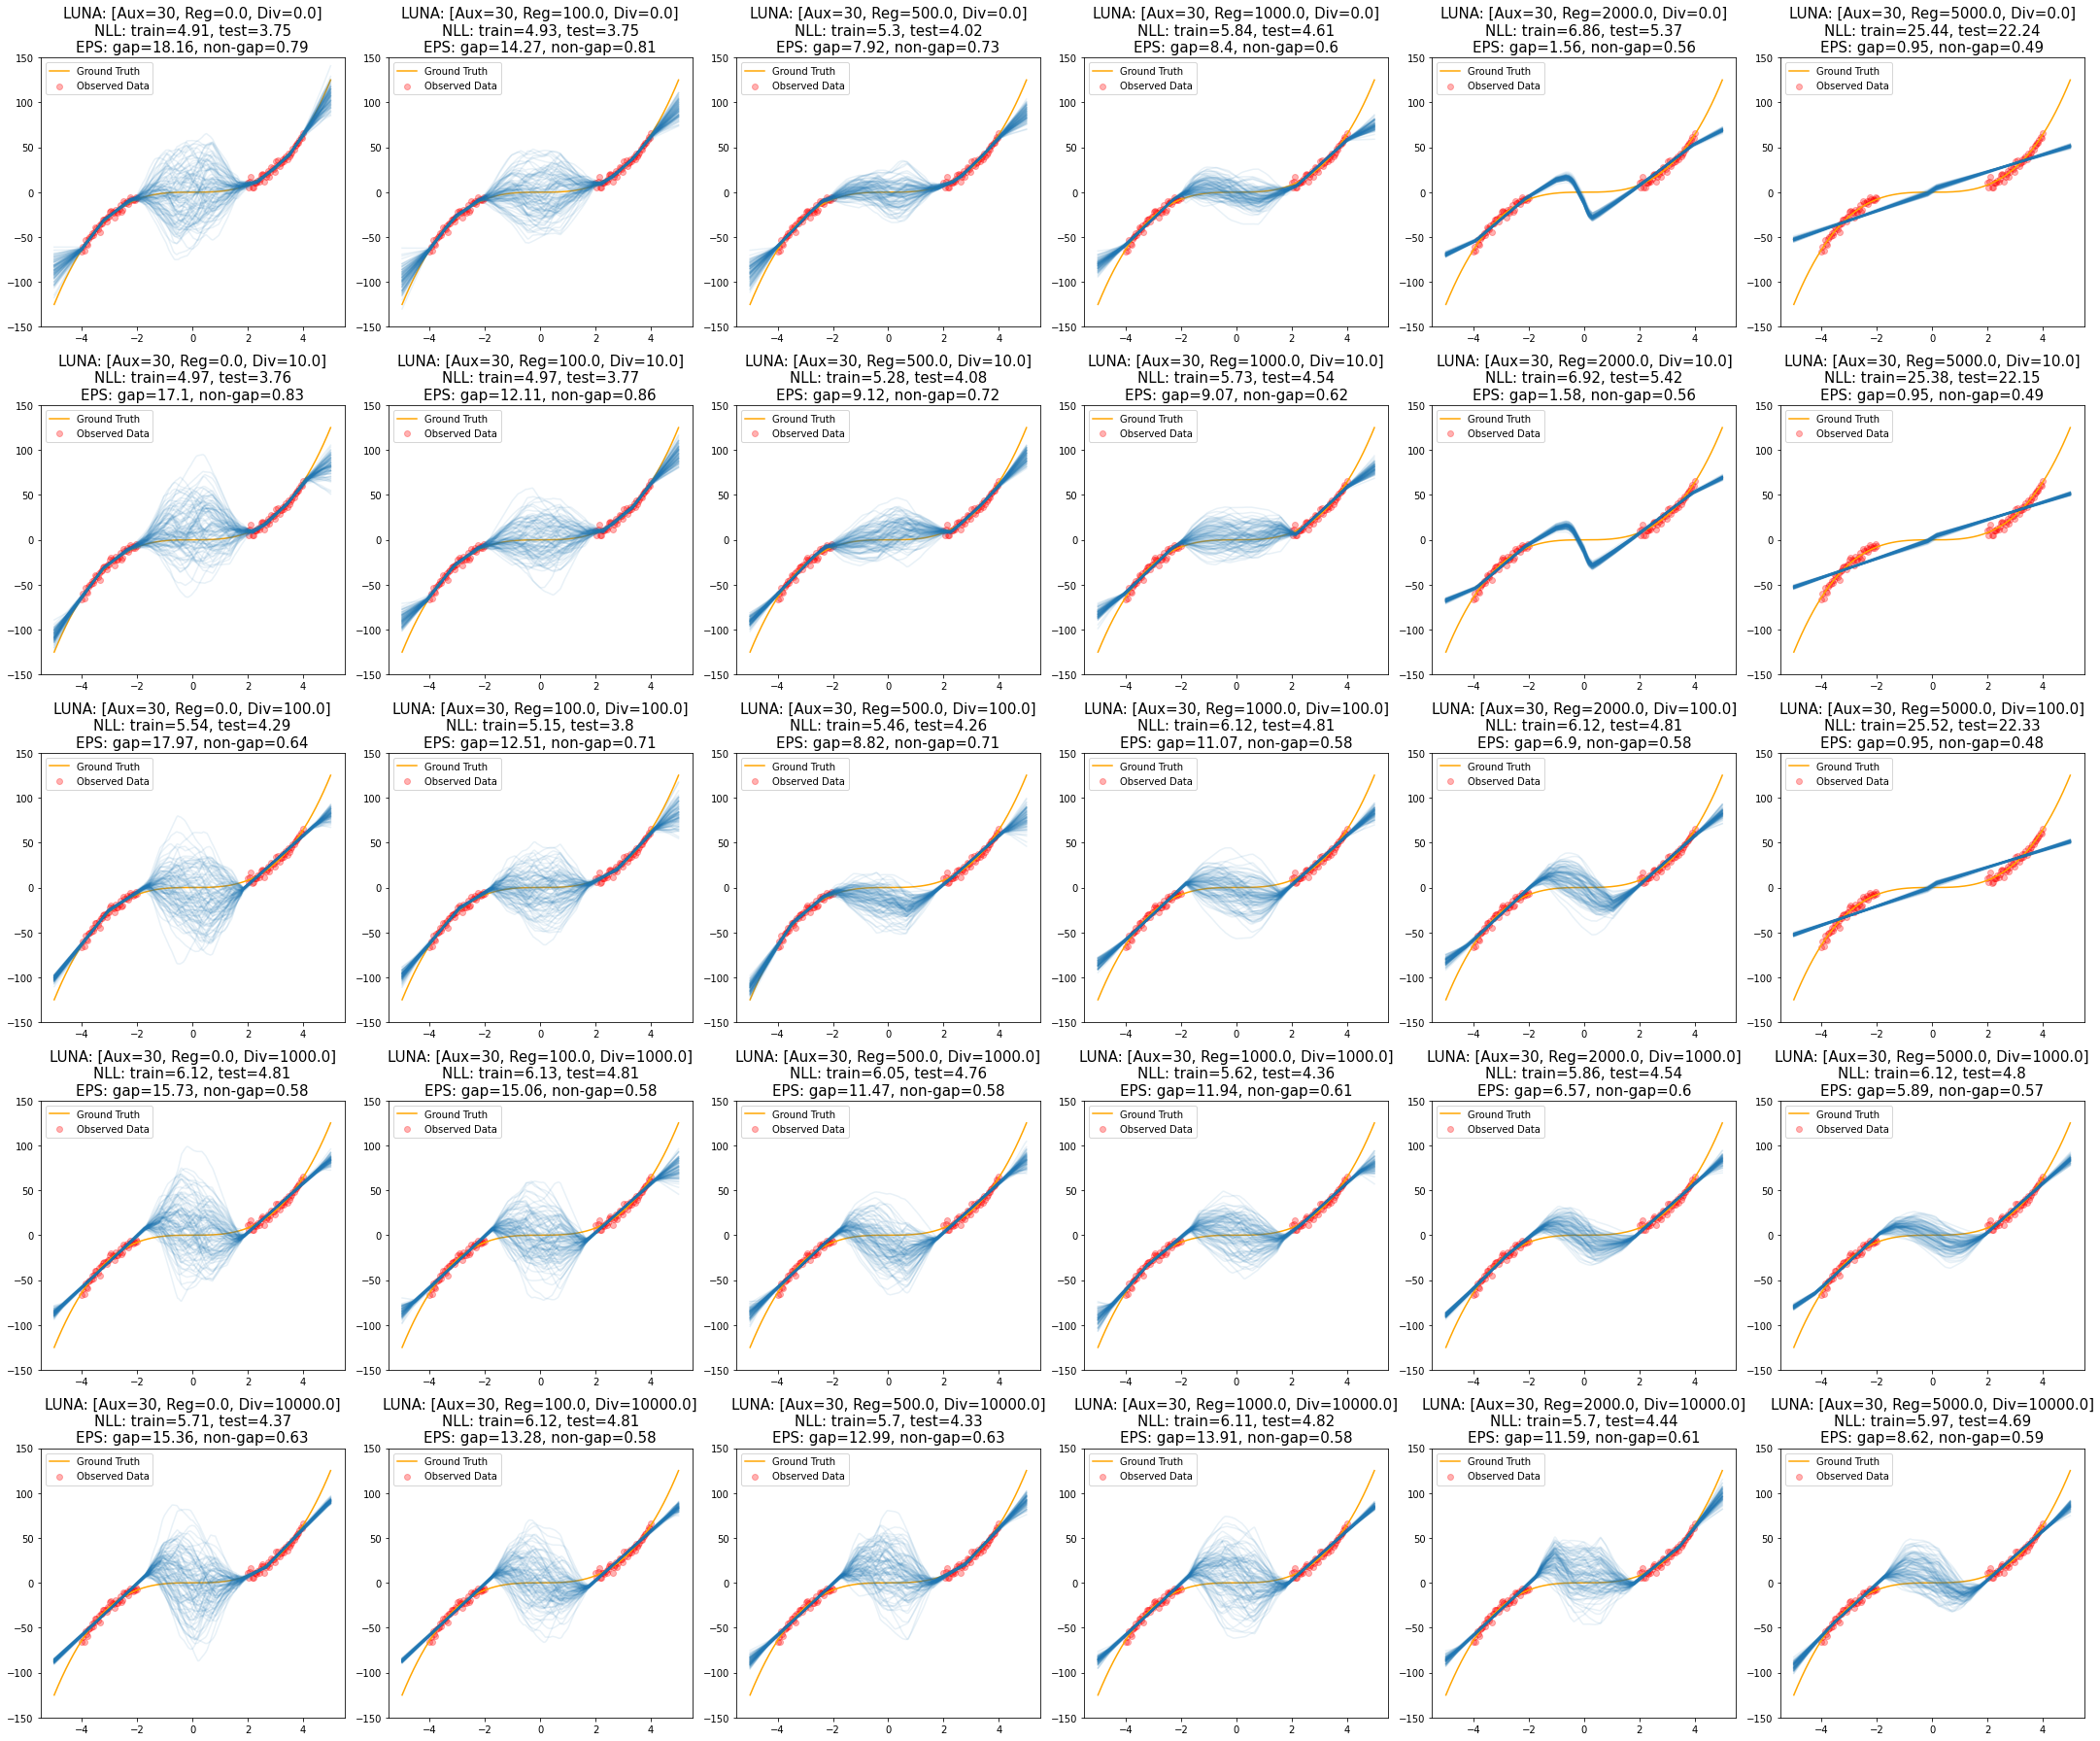

In [46]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 5))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(30, 25))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=15)
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

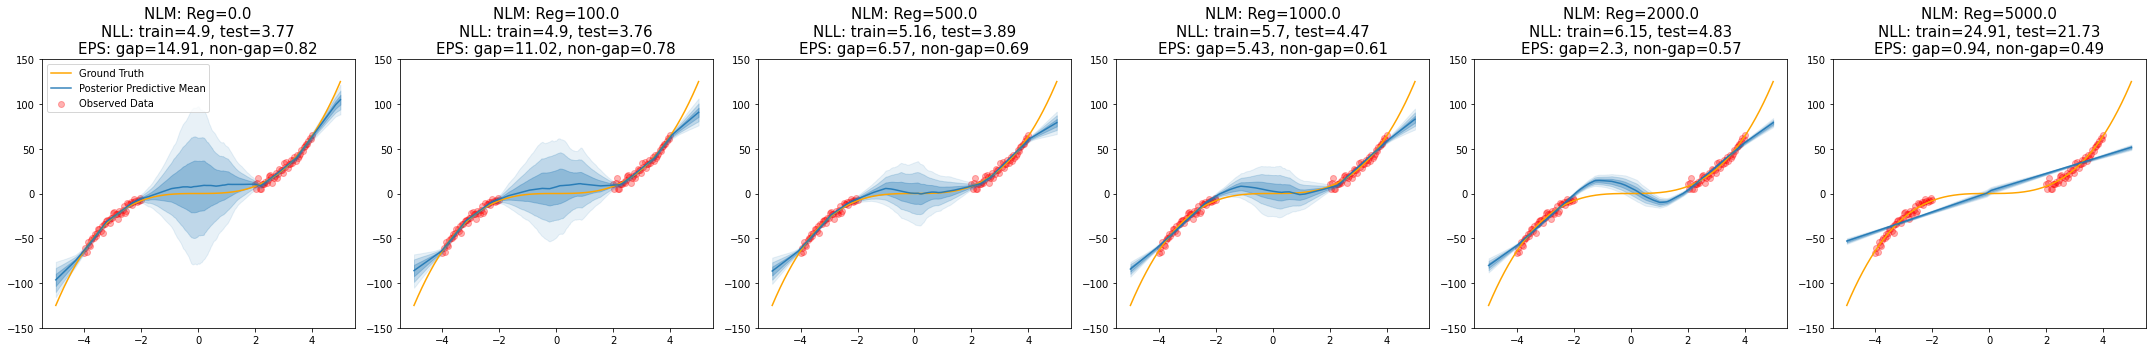

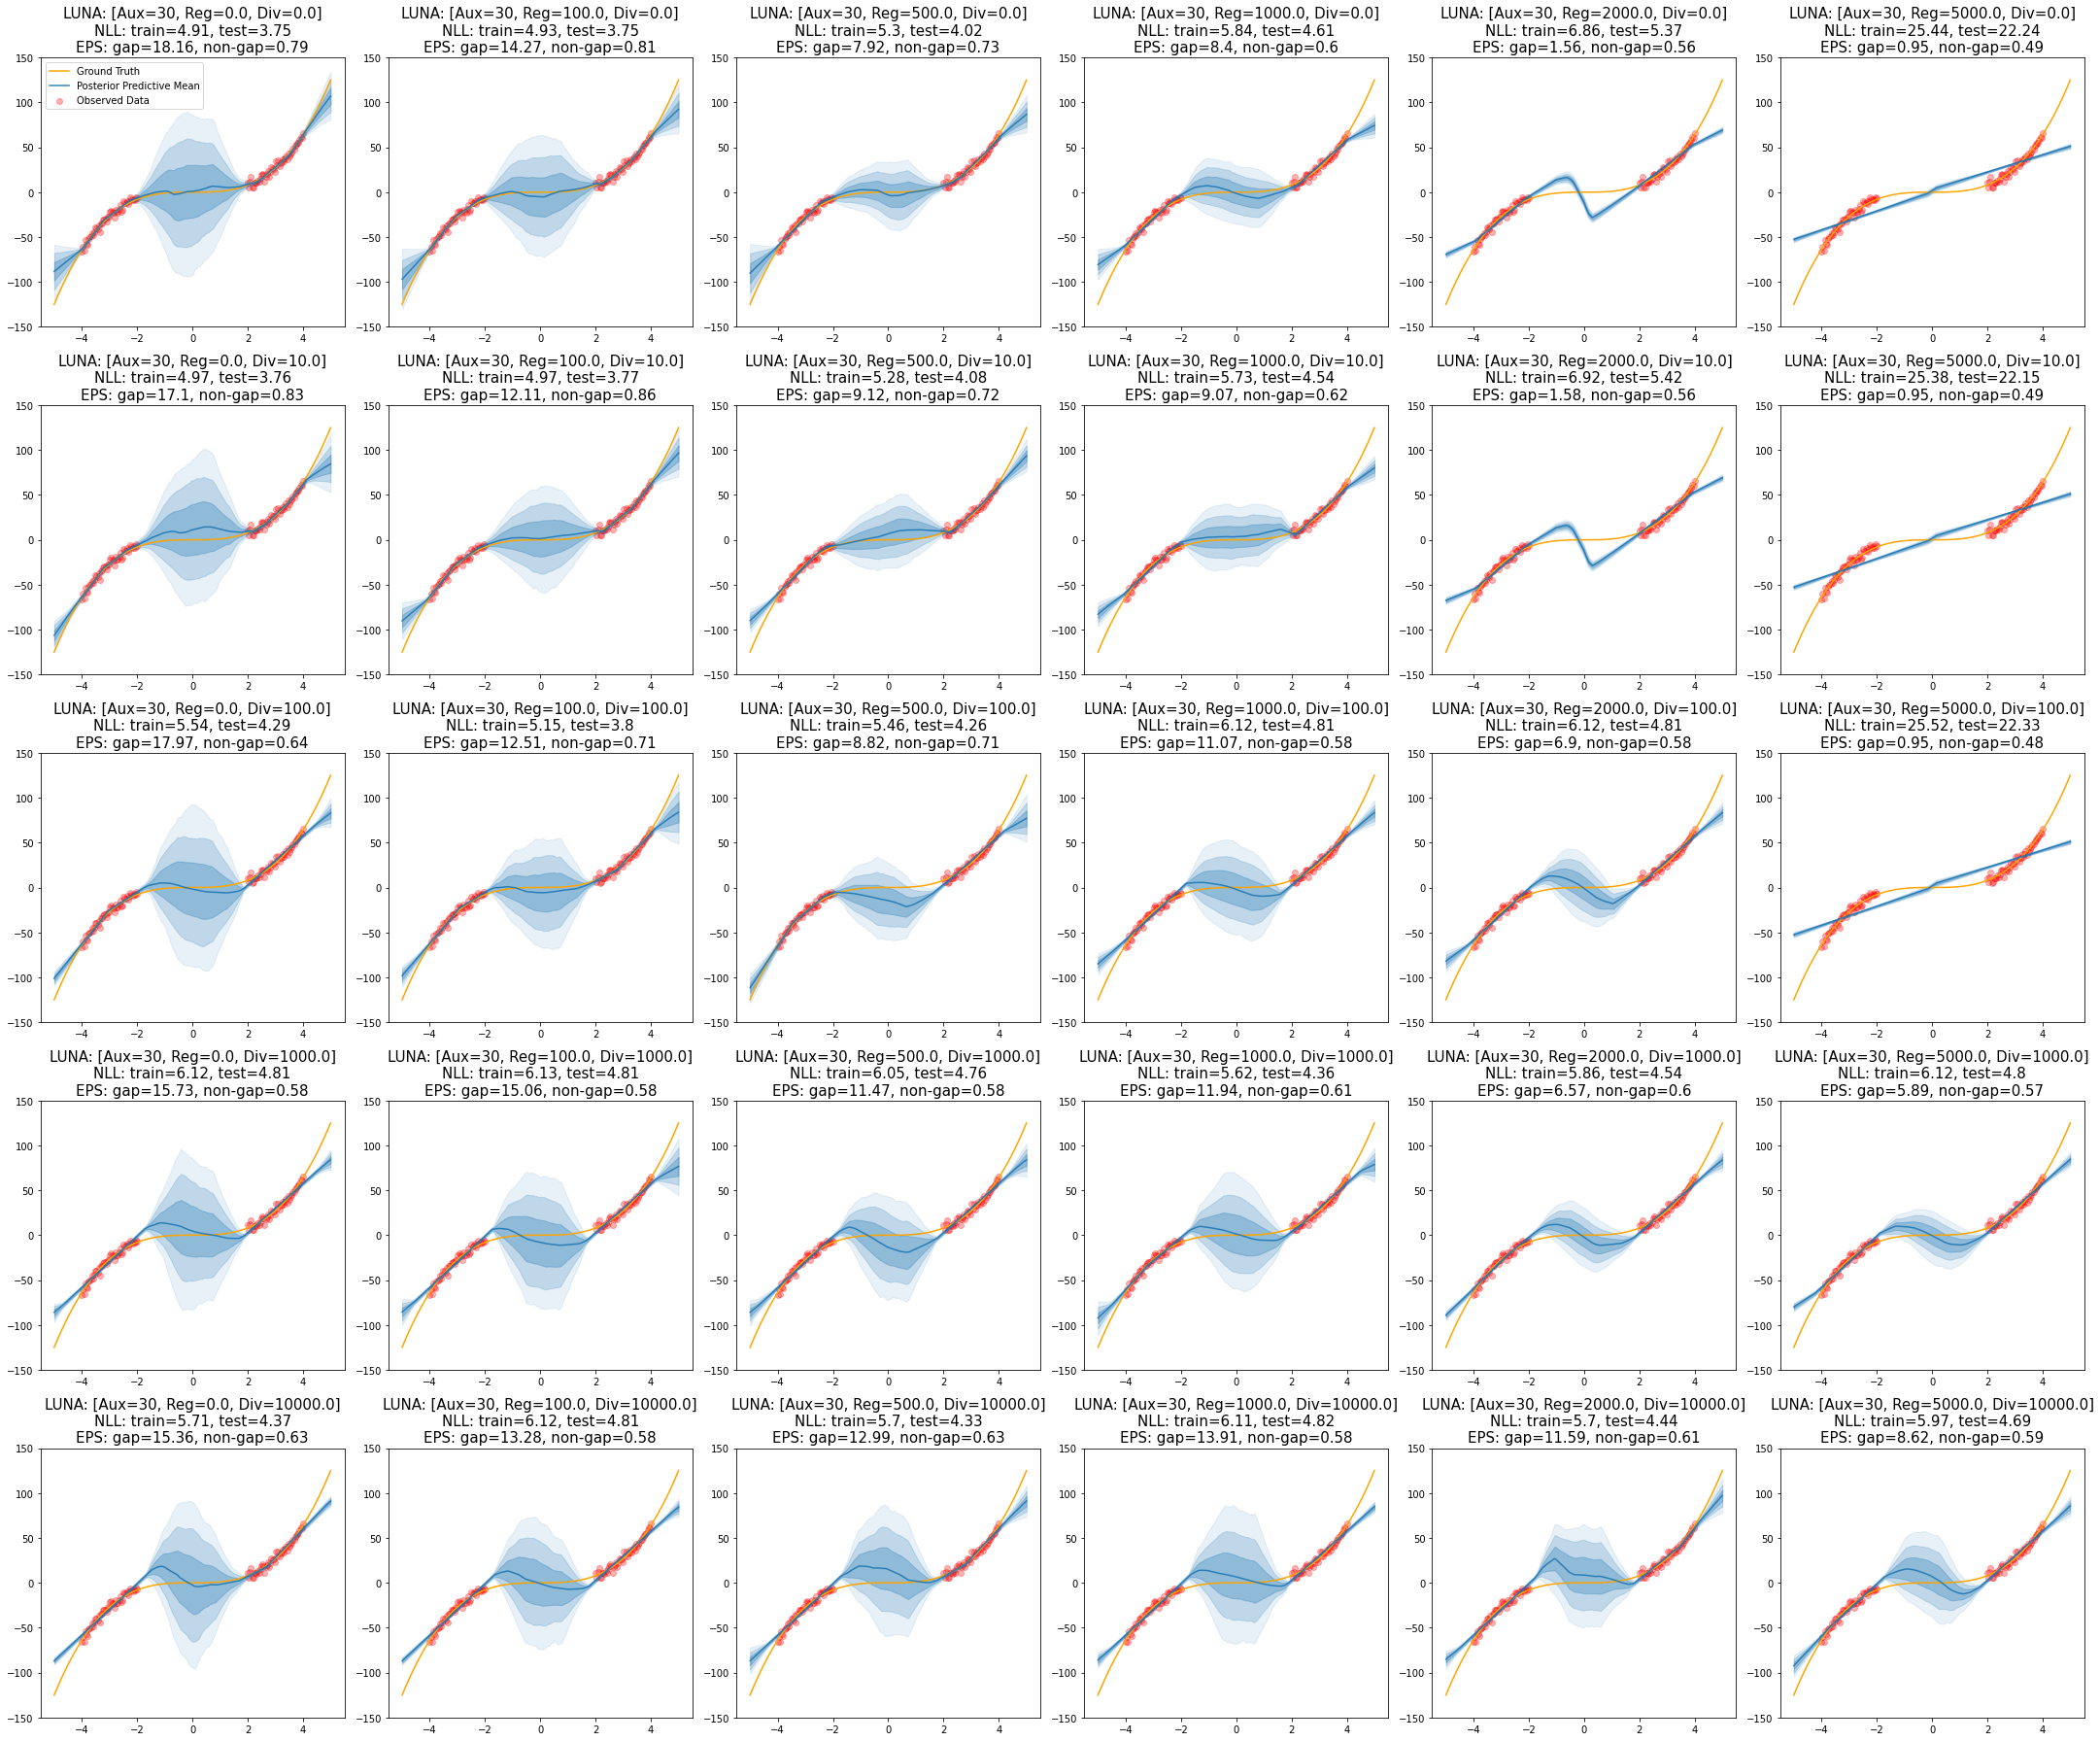

In [47]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 5))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)

    if i == 0:
        ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(30, 25))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])    
    ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=15)

    if i == 0:
        ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

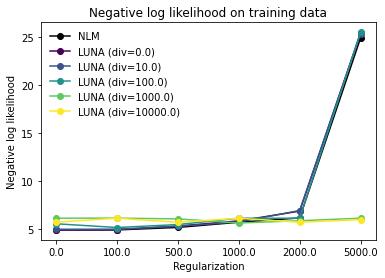

In [102]:
cmap = plt.get_cmap('viridis', len(div_grid))
plt.plot(nll_train_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on training data')
plt.show()

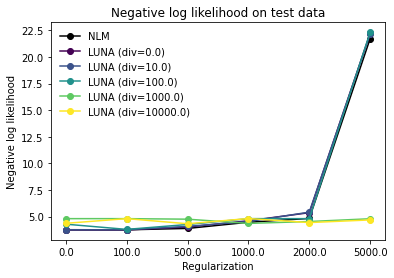

In [99]:
plt.plot(nll_test_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on test data')
plt.show()

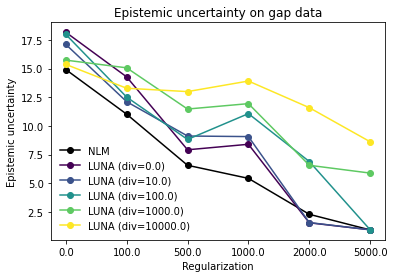

In [100]:
plt.plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on gap data')
plt.show()

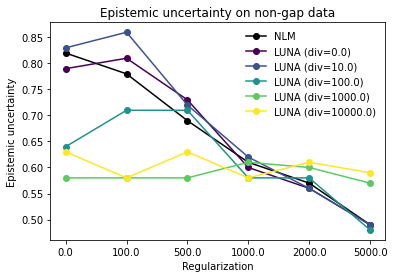

In [101]:
plt.plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on non-gap data')
plt.show()